<div dir="rtl" style="text-align: right;">
<h2>بُعد مینکوفسکی-بولیگاند</h2>

<h3>شرح مسئله</h3>
<p>اکنون می‌خواهیم بعد فرکتالی مجموعه ماندلبروت را با استفاده از بعد مینکوفسکی–بولیگاند اندازه‌گیری کنیم. برای این کار، ما باید با استفاده از روش شمارش جعبه‌ای و با اندازه جعبه‌ای کاهش‌یافته اقدام کنیم (به تصویر خروجی کد نگاه کنید). همان‌طور که تصور می‌کنید، نمی‌توانیم از پایتون به تنهایی استفاده کنیم زیرا خیلی کند خواهد بود. هدف از این تمرین نوشتن یک تابع با استفاده از نامپای است که یک آرایه دوبعدی اعداد اعشاری را بگیرد و بُعد فرکتالی آن را برگرداند. ما در نظر داریم که مقادیر در آرایه نرمالیزه شده‌اند (یعنی تمام مقادیر بین 0 و 1 هستند).</p>


<h3>راه‌حل کامل</h3>
<p>در اینجا راه‌حل دقیق برای یافتن بُعد فرکتال ارائه شده است:</p>

</div>


/tmp/ipykernel_79513/3333496293.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  Z = 1.0 - imread("statics/img/08_09_GreatBritain.png")/255


1.2403251356394434


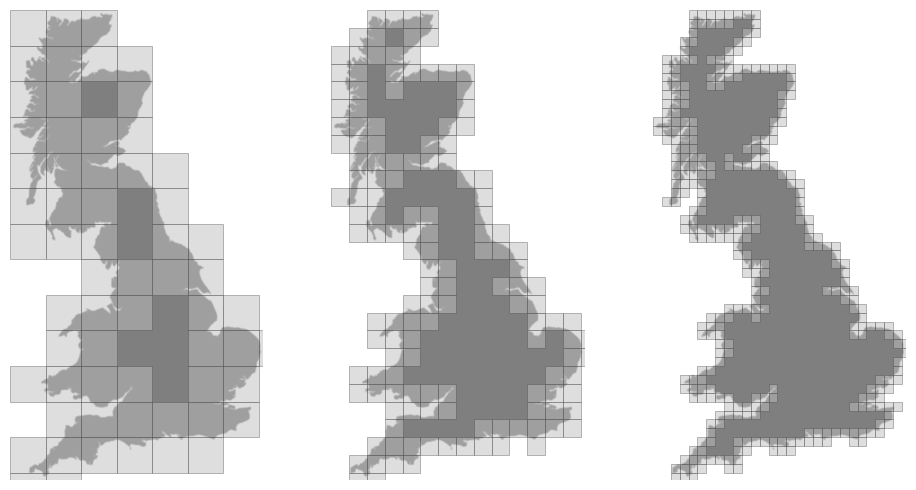

In [4]:

# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np

# محاسبه ابعاد فراکتال
def fractal_dimension(Z, threshold=0.9):
    def boxcount(Z, k):
        # شمارش تعداد کادرها
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where((S > 0) & (S < k*k))[0])
    # آماده‌سازی داده‌ها برای شمارش
    Z = (Z < threshold)
    p = min(Z.shape)
    n = 2**np.floor(np.log(p)/np.log(2))
    n = int(np.log(n)/np.log(2))
    sizes = 2**np.arange(n, 1, -1)
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))
    # خطی‌سازی نتایج و محاسبه شیب
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

if __name__ == '__main__':
    from imageio import imread
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    # خواندن تصویر و تبدیل آن
    Z = 1.0 - imread("statics/img/08_09_GreatBritain.png")/255

    print(fractal_dimension(Z, threshold=0.25))

    sizes = 128, 64, 32
    xmin, xmax = 0, Z.shape[1]
    ymin, ymax = 0, Z.shape[0]
    fig = plt.figure(figsize=(10, 5))

    # تجسم نحوه شمارش کادرها
    for i, size in enumerate(sizes):
        ax = plt.subplot(1, len(sizes), i+1, frameon=False)
        ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
                  extent=[xmin, xmax, ymin, ymax], origin="upper")
        ax.set_xticks([])
        ax.set_yticks([])
        for y in range(Z.shape[0]//size+1):
            for x in range(Z.shape[1]//size+1):
                s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
                if s > 0 and s < size*size:
                    rect = patches.Rectangle(
                        (x*size, Z.shape[0]-1-(y+1)*size),
                        width=size, height=size,
                        linewidth=.5, edgecolor='.25',
                        facecolor='.75', alpha=.5)
                    ax.add_patch(rect)

    plt.tight_layout()
    plt.savefig("statics/img/08_09_fractal-dimension.png")
    plt.show()
